<a href="https://colab.research.google.com/github/Shrinjita/DeepLearning/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


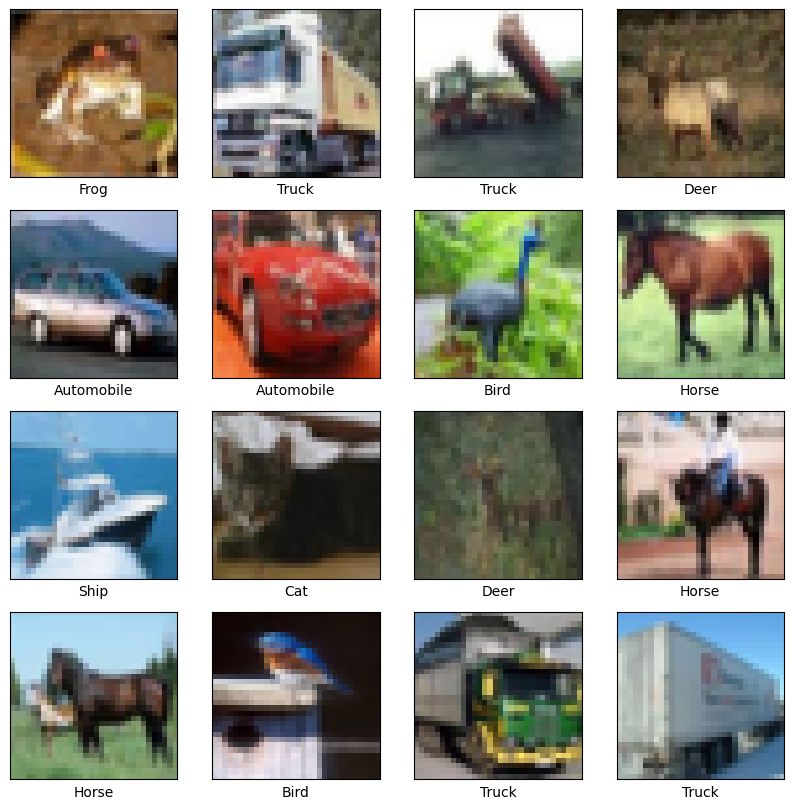

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.3530 - loss: 1.7555 - val_accuracy: 0.5206 - val_loss: 1.2986
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5662 - loss: 1.2143 - val_accuracy: 0.6102 - val_loss: 1.1027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6323 - loss: 1.0383 - val_accuracy: 0.6619 - val_loss: 0.9715
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.6714 - loss: 0.9327 - val_accuracy: 0.6670 - val_loss: 0.9692
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7041 - loss: 0.8520 - val_accuracy: 0.6690 - val_loss: 0.9341
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7179 - loss: 0.7964 - val_accuracy: 0.6996 - val_loss: 0.8864
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.7355 - loss: 0.7497 - val_accuracy: 0.6991 - val_loss: 0.8710
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.7562 -

In [12]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Step 2: Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 3: Display some sample images with their labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Step 4: Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
